# Testing generation of compatibility graph

In [1]:
from src import compatibilityGraph as compGraph
from src import circuit_gen as circGen
import networkx as nx


In [2]:
numModules = 4
moduleMaxQubits = 5
moduleMaxGates = 3
circuit = circGen.RandomCircuit(numModules, moduleMaxQubits, moduleMaxGates)
circuit.gen_random_circuit()

bufferDistance = 2
#it's possible to define a specific backend. if nothing is specified, the FakeGuadalupeV2 will be used
compatibilityGraph = compGraph.CompatibilityGraph(bufferDistance, circuit.modules)
resultingGraph = compatibilityGraph.generateCompatibilityGraph()


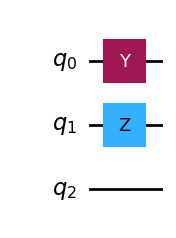

In [3]:
modulesSize = len(circuit.modules)
for i in range(modulesSize):
    circuit.modules[i].draw('mpl')
    break
    
circuit.modules[0].draw('mpl')
#circuit.modules[1].draw('mpl')

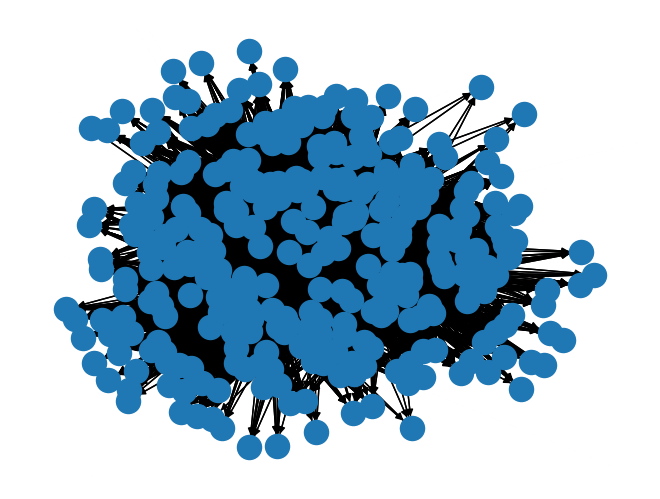

In [4]:
nx.draw(resultingGraph)

# Testing max clique

Clique con somma dei pesi massima: [(0, 43), (3, 3), (1, 9), (2, 10)]
Somma dei pesi: 0.7391911009345373


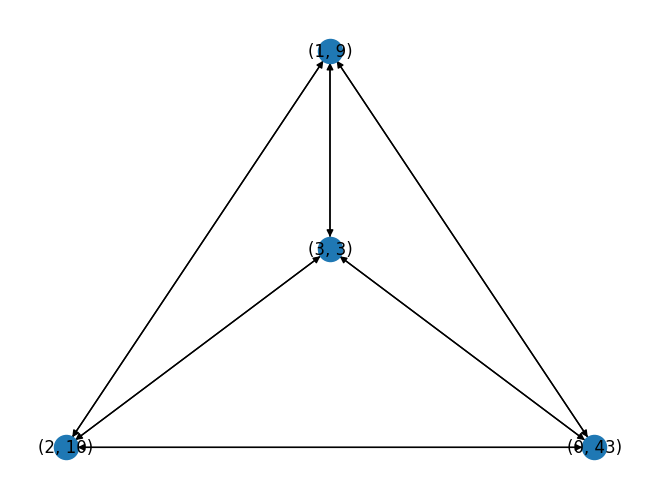

In [5]:
from src import max_clique


max_clique, max_weight = max_clique.find_max_clique(resultingGraph.to_undirected())
print("Clique con somma dei pesi massima:", max_clique)
print("Somma dei pesi:", max_weight)
nx.draw_planar(resultingGraph.subgraph(max_clique), with_labels = True)

In [9]:
best_layouts = []
for vertex in max_clique:
    best_layouts.append(compatibilityGraph.modules[vertex[0]][0][vertex[1]][0])
print(best_layouts)

[[15, 13], [6, 7], [0], [8, 5]]


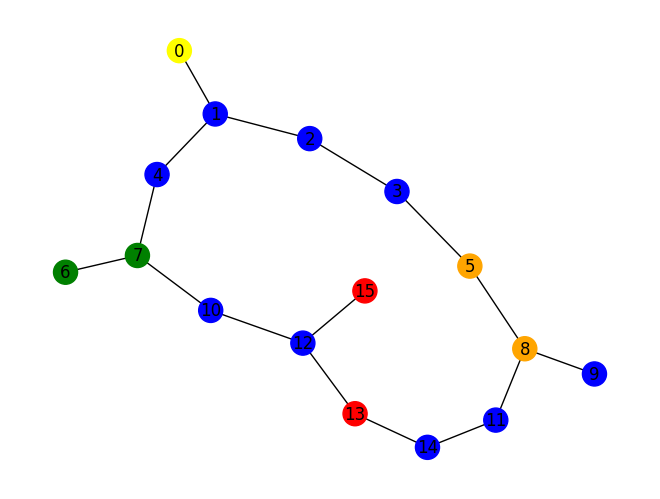

In [11]:
backend = compatibilityGraph.backend
couplings = backend.coupling_map.get_edges()
qc_graph = nx.from_edgelist(couplings)

colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink']
color_map = []
for node in qc_graph:
    in_layout = False
    for layoutIndex, layout in enumerate(best_layouts):
        if node in layout:
            color_map.append(colors[layoutIndex + 1])
            in_layout = True
            
    if not in_layout:
        color_map.append(colors[0])
            
nx.draw(qc_graph, node_color=color_map, with_labels=True)